# **菊安酱与菜菜的Python机器学习可视化**

## 第一期 关联图 (4)

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 08/50 相关性矩阵图

### 1. 相关性矩阵存在的必要性

相关性矩阵，又叫做热力图，是关联图中最重要的一张图像，它能够为我们展现多个变量两两之间的相关性  
  
关联图的目标是探索两个事物之间关系，它为我们展示出一个事物随着另一个事物的变化如何变化，但之前我们描述的关联图：折线图或散点图都只能够分析两个变量之间的相关性。在实际统计学和机器学习应用当中，我们往往需要探求多个变量两两之间的相关性。  

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%85%B3%E8%81%94%E5%9B%BE%E5%B1%95%E7%A4%BA.PNG" align="center" />

一个最典型的例子的例子是：在统计建模中，能够使用最小二乘法求解线性回归模型的充分必要条件是特征之间没有相关性（在统计学当中标准的术语应该叫做共线性），否则模型就会出现偏移，因此我们往往要先探索相关性，排除相关性，然后再建模  
  
<font color=red>**要探索众多变量两两之间的相关性，我们不太可能对每一组变量都绘制散点图，这样非常低效。**</font><br>

除此之外，即便我们绘制出了图像，我们也无法判断出相关性的强弱，<font color=red>**即如果相关，究竟有多相关呢？**</font><br>

所以我们要选择更加有效也更加直接的方式：
> **1. 引入衡量相关性的数学指标：相关系数(Correlation Coefficient)**  
>> 相关系数是某种类型相关性的数值度量，通常是有界的数字。最为人所知的就是皮尔逊相关系数，这个系数在-1~1之间波动，0表示完全无关，1表示完全正相关，-1表示完全负相关。

> **2. 绘制相关系数矩阵图，一次性查看所有变量两两之间的相关性**
>> 就是本节要绘制的图像。这张图实际上是由相关性矩阵和热力图一起构建的，热力图（heatmap）就是用颜色深浅来表示数值大小的图像

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/08%20%E7%9F%A9%E9%98%B5%E5%9B%BE.PNG" align="center" />

横坐标：一个数据集中的所有变量（可能包括特征或标签）<br>
纵坐标：一个数据集中的所有变量（可能包括特征或标签）  
颜色：颜色越接近红和绿，相关性越强，绿色代表正相关，红色代表负相关，浅黄色代表不相关

### 2. 导入需要的绘图库 & 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [5]:
#导入数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [13]:
print(df)

       英里/加仑  气缸数量     排量  总马力  驱动轴比     重量  1/4英里所用时间  引擎  变速器  前进档数  化油器数量  \
0   4.582576     6  160.0  110  3.90  2.620      16.46   0    1     4      4   
1   4.582576     6  160.0  110  3.90  2.875      17.02   0    1     4      4   
2   4.774935     4  108.0   93  3.85  2.320      18.61   1    1     4      1   
3   4.626013     6  258.0  110  3.08  3.215      19.44   1    0     3      1   
4   4.324350     8  360.0  175  3.15  3.440      17.02   0    0     3      2   
5   4.254409     6  225.0  105  2.76  3.460      20.22   1    0     3      1   
6   3.781534     8  360.0  245  3.21  3.570      15.84   0    0     3      4   
7   4.939636     4  146.7   62  3.69  3.190      20.00   1    0     4      2   
8   4.774935     4  140.8   95  3.92  3.150      22.90   1    0     4      2   
9   4.381780     6  167.6  123  3.92  3.440      18.30   1    0     4      4   
10  4.219005     6  167.6  123  3.92  3.440      18.90   1    0     4      4   
11  4.049691     8  275.8  180  3.07  4.

In [6]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [18]:
df.isnull().sum()/df.count()

英里/加仑        0.0
气缸数量         0.0
排量           0.0
总马力          0.0
驱动轴比         0.0
重量           0.0
1/4英里所用时间    0.0
引擎           0.0
变速器          0.0
前进档数         0.0
化油器数量        0.0
用油是否高效       0.0
汽车           0.0
汽车名称         0.0
dtype: float64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
英里/加仑,32.0,4.434770,0.661137,3.224903,3.927432,4.38178,4.774935,5.822371
气缸数量,32.0,6.187500,1.785922,4.000000,4.000000,6.00000,8.000000,8.000000
排量,32.0,230.721875,123.938694,71.100000,120.825000,196.30000,326.000000,472.000000
总马力,32.0,146.687500,68.562868,52.000000,96.500000,123.00000,180.000000,335.000000
驱动轴比,32.0,3.596563,0.534679,2.760000,3.080000,3.69500,3.920000,4.930000
重量,32.0,3.217250,0.978457,1.513000,2.581250,3.32500,3.610000,5.424000
1/4英里所用时间,32.0,17.848750,1.786943,14.500000,16.892500,17.71000,18.900000,22.900000
引擎,32.0,0.437500,0.504016,0.000000,0.000000,0.00000,1.000000,1.000000
变速器,32.0,0.406250,0.498991,0.000000,0.000000,0.00000,1.000000,1.000000
前进档数,32.0,3.687500,0.737804,3.000000,3.000000,4.00000,4.000000,5.000000


In [10]:
#所用数据集mtcars 记录了32种不同品牌的轿车的11个属性

name = ["英里/加仑","气缸数量","排量","总马力","驱动轴比","重量"
        ,"1/4英里所用时间","引擎","变速器","前进档数","化油器数量","用油是否高效"
        ,"汽车","汽车名称"]

df.columns = name #替换掉英文的列名

In [10]:
#英里/加仑：每加仑油耗可以跑的英里数，这个数值越大代表汽车越节能
#用油是否高效：不难注意到，其实这个特征中的0和1是根据特征英里/加仑来决定的，如果英里/加仑大于4，则用油高效（1），否则用油不高效（0）
#引擎：分为V（V型）和S（直型）两种，其中1为V型，0为直型

In [13]:
#其中cars和carname是一模一样的数据

(df["汽车"] != df["汽车名称"]).sum()

0

### 3. 先实现相关性矩阵，再实现热力图

> **df.corr()：实现相关性矩阵**  
>> method：填写相关系数类型的参数，可以选择"pearson"，"kendall"，"spearman"

In [14]:
df

,英里/加仑,气缸数量,排量,总马力,驱动轴比,重量,1/4英里所用时间,引擎,变速器,前进档数,化油器数量,用油是否高效,汽车,汽车名称
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout
5,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,Valiant,Valiant
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360
7,4.939636,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,Merc 240D,Merc 240D
8,4.774935,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,Merc 230,Merc 230
9,4.381780,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1,Merc 280,Merc 280


In [18]:
df.corr(method = "pearson")

,英里/加仑,气缸数量,排量,总马力,驱动轴比,重量,1/4英里所用时间,引擎,变速器,前进档数,化油器数量,用油是否高效
英里/加仑,1.000000,-0.858539,-0.867536,-0.787309,0.680312,-0.883453,0.420317,0.669260,0.593153,0.487226,-0.553703,0.730748
气缸数量,-0.858539,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,-0.695182
排量,-0.867536,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,-0.732073
总马力,-0.787309,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,-0.751422
驱动轴比,0.680312,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,0.400430
重量,-0.883453,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,-0.611265
1/4英里所用时间,0.420317,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,0.488649
引擎,0.669260,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,0.594588
变速器,0.593153,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,0.283129
前进档数,0.487226,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,0.266919


什么时候用什么相关系数？变量相关时：

| 分类型变量vs分类型变量 | 分类型变量vs连续型变量 | 连续型变量vs连续型变量 |
| --- | --- | --- |
| 列联表分析<br>卡方检验(chi-squared) | 二分类：点双列相关（皮尔逊相关系数的一种特殊情况）<br>多分类：Kruskal-Wallis H检验（如t检验或方差分析） |线性相关：皮尔逊相关系数<br>非线性相关：以斯皮尔曼相关系数为代表的一系列等级相关系数|

比较特别的是kendall这个相关系数，它对比的是两个变量按数量排序时（从小到大，或者从大到小），数据排序的相似性。  
其他相关系数，大家可以在scipy，numpy库中找到（百度和谷歌是你的好帮手）

In [19]:
coef = df.corr()

In [22]:
coef

,英里/加仑,气缸数量,排量,总马力,驱动轴比,重量,1/4英里所用时间,引擎,变速器,前进档数,化油器数量,用油是否高效
英里/加仑,1.000000,-0.858539,-0.867536,-0.787309,0.680312,-0.883453,0.420317,0.669260,0.593153,0.487226,-0.553703,0.730748
气缸数量,-0.858539,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,-0.695182
排量,-0.867536,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,-0.732073
总马力,-0.787309,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,-0.751422
驱动轴比,0.680312,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,0.400430
重量,-0.883453,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,-0.611265
1/4英里所用时间,0.420317,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,0.488649
引擎,0.669260,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,0.594588
变速器,0.593153,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,0.283129
前进档数,0.487226,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,0.266919


In [23]:
coef.columns = name[:12]

In [35]:
coef.shape

(12, 12)

In [44]:
import numpy as np

In [45]:
np.zeros((12,12))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

> **sns.heatmap：把相关性矩阵放到热力图里去**  
>> data：输入的相关性矩阵  
>> cmap：使用的光谱  
>> center：绘制有色数据时，位于光谱中心的颜色所对应的值，注意：这是一个控制颜色的参数。如果没有指定cmap，使用此参数将更改默认的``cmap``参数。我们一般在center中填写数据的中值，比如皮尔逊相关系数的取值范围是[-1,1]，我们就在center中填写0    
>> annot：如果为True，则在热力图的每个单元格中写入数据值。如果是一个类似于``data``形状的数组，那么使用它来注释热图而不是原始数据

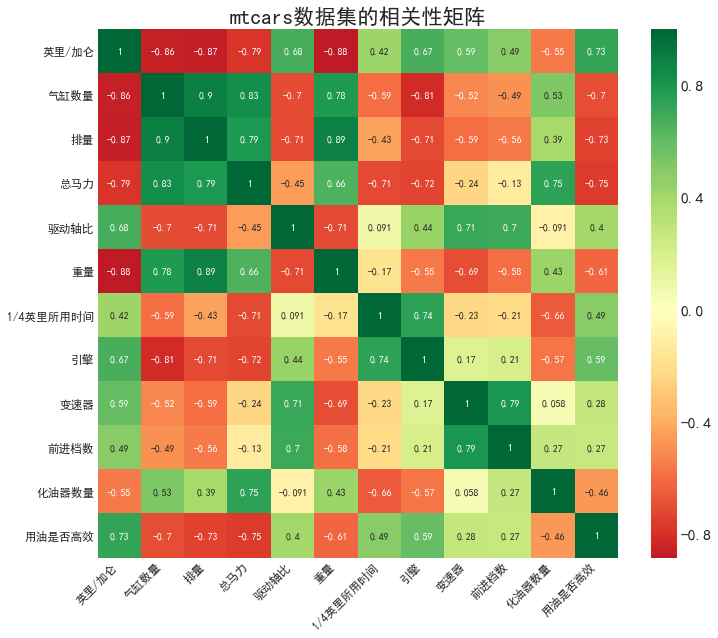

In [59]:
#确保正常显示中文+负号
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

#绘制图像
plt.figure(figsize=(12,10), dpi= 70)
sns.heatmap(df.corr() #需要输入的相关性矩阵
            , xticklabels=coef.columns #横坐标标签
            , yticklabels=coef.columns #纵坐标标签
            , cmap='RdYlGn' #使用的光谱，一般来说都会使用由浅至深，或两头颜色差距较大的光谱
         #   , cmap='winter' #不太适合做热力图的光谱
            , center=0 #填写数据的中值，注意观察此时的颜色条，大于0的是越来越靠近绿色，小于0的越来越靠近红色
         #   , center= -1 #填写数据中的最大值/最小值，则最大值/最小值是最浅或最深的颜色，数据离该极值越远，颜色越浅/颜色越深
            , annot=True
           )

#装饰图像
plt.title('mtcars数据集的相关性矩阵', fontsize=22)
plt.xticks(fontsize=12 #字体大小
           ,rotation=45 #字体是否进行旋转
           ,horizontalalignment='right' #刻度的相对位置
          )
plt.yticks(fontsize=12)
plt.show()

### 4. 解读图像

In [83]:
#所用数据集mtcars 记录了32种不同品牌的轿车的的11个属性

name = ["英里/加仑","气缸数量","排量","总马力","驱动轴比","重量"
        ,"1/4英里所用时间","引擎","变速器","前进档数","化油器数量","用油是否高效"
        ,"汽车","汽车名称"]

#英里/加仑：每加仑油耗可以跑的英里数，这个数值越大代表汽车越节能
#用油是否高效：不难注意到，其实这个特征中的0和1是根据特征英里/加仑来决定的，如果英里/加仑大于4，则用油高效（1），否则用油不高效（0）
#引擎：分为V（V型）和S（直型）两种，其中1为V型，0为直型

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 09/50 成对分析图

成对分析图是以图像形式分析多个变量之间相关性的图像，是矩阵图的具象化。  
如我们之前所学习的，我们可以使用散点图，或者带最佳拟合线的散点图来描述变量两两之间的关系。  
但当我们有着探索多个特征两两之间关系的需求时，一一绘制图像的效率比较低下，因此我们才引入相关性矩阵。  
但如果我们还是希望绘制出图像，我们就可以使用成对分析图，一种类矩阵的绘图方式，一次性绘制出所有特征之间的相关性图像。  
成对分析图的横坐标是所有特征，纵坐标也是所有特征。  
**横纵坐标为不同的特征时，显示两个特征之间的相关性图像。  
当横纵坐标为同一个特征时，显示这个特征自身的分布图。**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/09%20%E6%88%90%E5%AF%B9%E5%88%86%E6%9E%90%E5%9B%BE.PNG" align="center" />

横坐标&纵坐标：花萼长，花萼宽，花瓣长，花瓣宽<br>
图例：三种不同名称的鸢尾花

### 1. 导入需要的绘图库

In [70]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据

In [71]:
#seaborn中自带数据库，可以从中导入著名的鸢尾花数据集
df = sns.load_dataset('iris')

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
df.shape

(150, 5)

In [79]:
df.columns = ["花萼长","花萼宽","花瓣长","花瓣宽","species"]

In [80]:
df.head()

,花萼长,花萼宽,花瓣长,花瓣宽,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/iris.PNG" align="center" />

### 3. 代码解读，图像解读

#### **sns.pairplot()**

> 重要参数：  
>> hue：类别所在的列（和带拟合线的散点图一致），取出数据集的子集，对数据集进行分类，其实单词“hue”是色调的意思，我们可以将这个参数与我们之前的类中的参数c来进行对比，在这个参数中输入不同的类别，可以让不同的数据集展示不同的颜色  
>> kind：绘制的相关性图像类型，可以选择“scatter”散点图或者“reg”带拟合线的散点图

<Figure size 800x640 with 0 Axes>

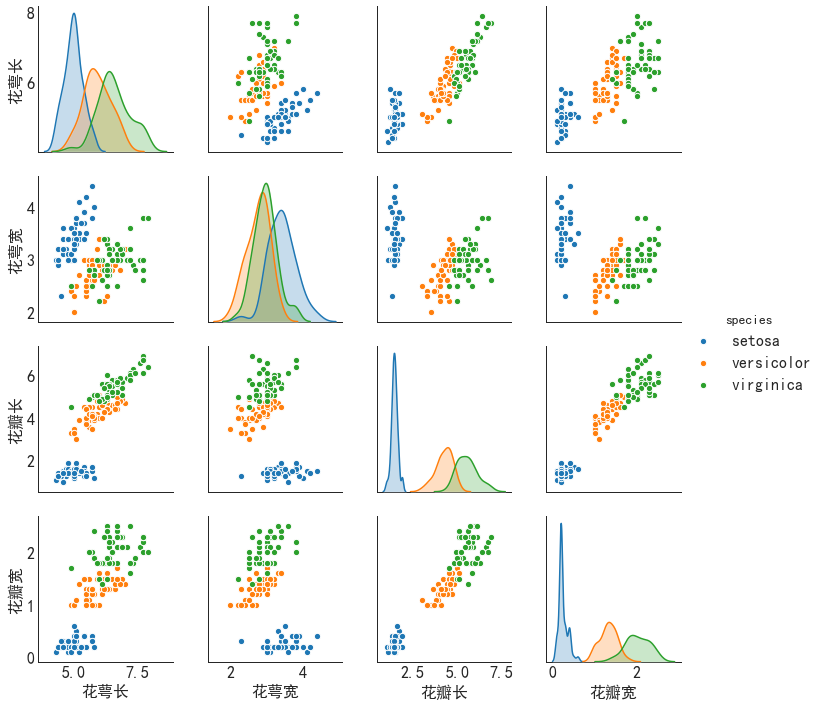

In [81]:
#绘制图像 - 散点图
plt.figure(figsize=(10,8), dpi = 80) #设置画布
plt.rcParams['font.sans-serif']=['Simhei'] #中文能够显示
sns.pairplot(df #数据，各个特征和标签
             , kind="scatter" #要绘制的图像类型
             , hue="species" #类别所在的列（标签）
             , plot_kws=dict(s=40, edgecolor="white", linewidth=1) #散点图的一些详细设置
            );

<Figure size 800x640 with 0 Axes>

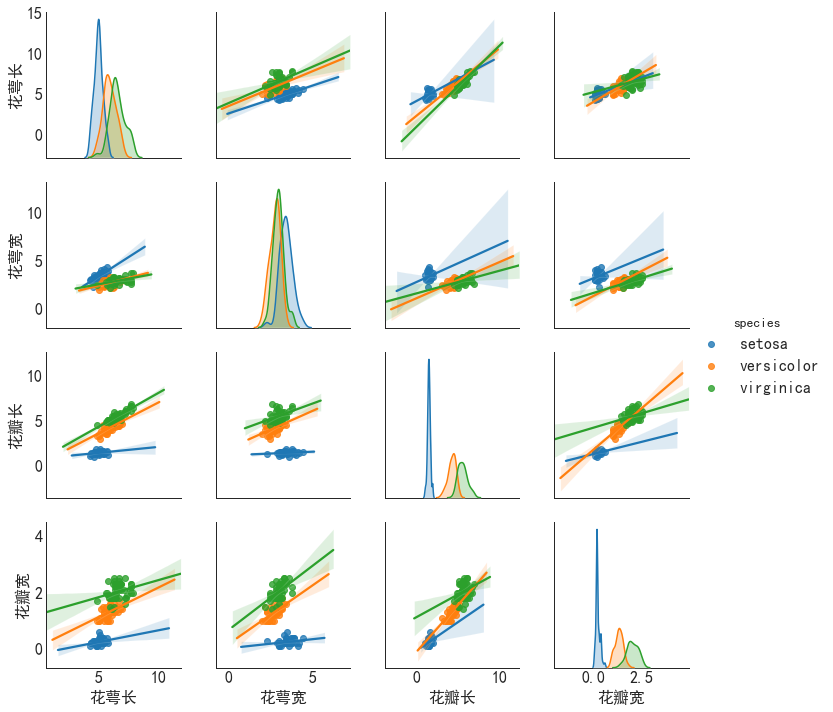

In [82]:
#绘制图像 - 带拟合线的散点图
plt.figure(figsize=(10,8), dpi= 80)
plt.rcParams['font.sans-serif']=['Simhei']
sns.pairplot(df, kind="reg", hue="species");

什么时候用相关性矩阵，什么时候用成对分析图呢？

> 当我们希望探索不同分类下的特征之间的相关性的时候，用成对分析图  
> 当特征很多的时候，使用相关性矩阵，当特征只有少数几个的时候，使用成对分析图  
> 在意特征本身的分布时，使用成对分析图  
> 当数据较少时，使用成对分析图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />